# Load and Visualize Data

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms
import cv2

%matplotlib inline

In [24]:
key_pts_frame = pd.read_csv('data/training_frames_keypoints.csv')
key_pts_frame.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [25]:
key_pts_frame.rename({'Unnamed: 0': 'file_name'}, inplace=True, axis=1)
key_pts_frame.head()

,file_name,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [33]:
file_name = key_pts_frame.iloc[0, 0]
key_pts = key_pts_frame.iloc[0, 1:].values.astype('float').reshape(-1, 2)

print(f"File Name: {file_name}")
print(f"Keypoints Shape: {key_pts.shape}")
print(f"Keypoints Example (x, y): {key_pts[0]}")
print(f"Dataset Size: {key_pts_frame.shape[0]}")

File Name: Luis_Fonsi_21.jpg
Keypoints Shape: (68, 2)
Keypoints Example (x, y): [45. 98.]
Dataset Size: 3462


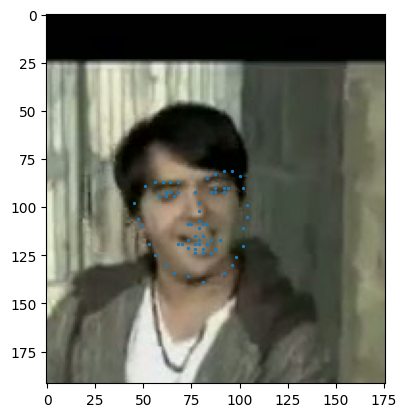

In [58]:
img_path = os.path.join('data', 'training', file_name)

plt.imshow(mpimg.imread(img_path))
plt.scatter(key_pts[:, 0], key_pts[:, 1], s=2)
plt.show()

In [79]:
class FacialKeypointsDataset(Dataset):
    def __init__(self, keypoints_file, img_dir, transform=None):
        self.keypoints_df = pd.read_csv(keypoints_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.keypoints_df)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.keypoints_df.iloc[idx, 0])
        image = mpimg.imread(img_path)
        
        if image.shape[2] == 4:
            image = image[..., :3]
        
        keypoints = self.keypoints_df.iloc[idx, 1:].values.astype('float').reshape(-1, 2)
        sample = {'image': image, 'keypoints': keypoints}
        
        if self.transform:
            sample = self.transform(sample)
        return sample

In [80]:
face_dataset = FacialKeypointsDataset(keypoints_file=os.path.join('data', 'training_frames_keypoints.csv'),
                                      img_dir=os.path.join('data', 'training'))
len(face_dataset)

3462

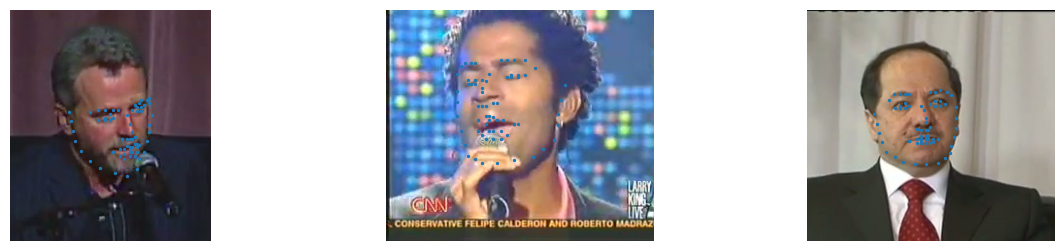

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
    
for i in range(3):
    rand_value = np.random.randint(0, len(face_dataset))
    sample = face_dataset[rand_value]
    ax[i].imshow(sample['image'])
    ax[i].scatter(sample['keypoints'][:, 0], sample['keypoints'][:, 1], s=2)
    ax[i].axis('off')
plt.show()

In [96]:
print("Standard Deviation of keypoints: ", np.std(key_pts_frame.drop(['file_name'], axis=1).to_numpy().reshape(-1, 2), axis=0))
print("Mean of keypoints: ", np.mean(key_pts_frame.drop(['file_name'], axis=1).to_numpy().reshape(-1, 2), axis=0))

Standard Deviation of keypoints:  [42.7988386  42.71434865]
Mean of keypoints:  [ 98.49069732 110.45427668]


In [111]:
class Normalize(object):
    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']
        img_copy = np.copy(image)
        keypts_copy = np.copy(keypoints)
        
        img_copy = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)[..., np.newaxis]
        img_copy = img_copy / 255.
        keypts_copy = (keypts_copy-100.)/50.
        
        return {'image': img_copy, 'keypoints': keypts_copy}

class Rescale(object):
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']
        h, w = image.shape[:2]
        
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)
        img = cv2.resize(image, (new_w, new_h))
        keypoints = keypoints * [new_w / w, new_h / h]
        
        return {'image': img, 'keypoints': keypoints}


class RandomCrop(object):
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]
        keypoints = keypoints - [left, top]

        return {'image': image, 'keypoints': keypoints}


class ToTensor(object):
    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']        
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'keypoints': torch.from_numpy(keypoints)}

In [112]:
transform_pipeline = transforms.Compose([Rescale(250),
                                         RandomCrop(224),
                                         Normalize(),
                                         ToTensor()])

transformed_dataset = FacialKeypointsDataset(keypoints_file=os.path.join('data', 'training_frames_keypoints.csv'),
                                             img_dir=os.path.join('data', 'training'),
                                             transform=transform_pipeline)

In [116]:
print('Number of images: ', len(transformed_dataset))

sample = transformed_dataset[0]
print(sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
torch.Size([1, 224, 224]) torch.Size([68, 2])


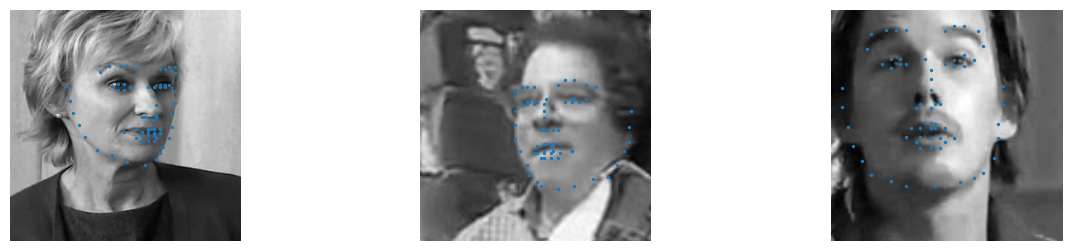

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
    
for i in range(3):
    rand_value = np.random.randint(0, len(face_dataset))
    sample = transformed_dataset[rand_value]
    ax[i].imshow(sample['image'].numpy().transpose(1, 2, 0), cmap='gray')
    ax[i].scatter(sample['keypoints'].numpy()[:, 0]*50+100, sample['keypoints'].numpy()[:, 1]*50+100, s=2)
    ax[i].axis('off')
plt.show()

# Create the Network

# Full Pipeline

# Additional Fun